<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/SM_10_Comparacao_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparando modelos utilizando as métricas de avaliação de modelos

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")

Importando o Dataset

In [ ]:
from sklearn import datasets
data  = datasets.load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

Contextualização:

O conjunto de dados de diabetes usado neste exemplo é proveniente do sklearn.datasets. As variáveis presentes no conjunto de dados são:

*   age: Idade do paciente.
*   sex: Gênero do paciente (0: feminino, 1: masculino).
*   bmi: Índice de massa corporal (IMC).
*   bp: Pressão arterial média.
*   s1: Total de soro de lipoproteína de alta densidade (HDL).
*   s2: Total de soro de lipoproteína de baixa densidade (LDL).
*   s3: Total de soro de triglicerídeos.
*   s4: Total de soro de total de lipoproteína.
*   s5: Total de soro de ácido sérico.
*   s6: Total de soro de lamotrigina.
Cada uma dessas variáveis representa diferentes características médicas e fisiológicas dos pacientes.

O objetivo é prever a medida quantitativa da progressão da doença diabética após um ano com base nessas características. O valor alvo (target) é uma medida quantitativa da progressão da doença.

Verificando os dados carregados

In [ ]:
data.feature_names #nome das variaveis

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
data.data.shape  #tamanho da base de dados

(442, 10)

In [ ]:
data.target.shape

(442,)

Criando um data frame para iniciar as analises

In [ ]:
db_df = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
db_df['progressao'] = data.target

In [ ]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
db_df.isna().sum() #verificando valores ausentes

age           0
sex           0
bmi           0
bp            0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
progressao    0
dtype: int64

# Análise descritiva

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
db_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [ ]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    float64
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    float64
 10  progressao  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


***Análise gráfica***

A análise gráfica é uma maenira eficaz de entender as relações de variáveis
 e identificar padrões nos dados.

O pairplot cria um conjunto de gráficos de dispersão entre todas as variáveis, além de exibir histogramas na diagonal. Isso permite visualizar rapidamente as relações entre as variáveis.

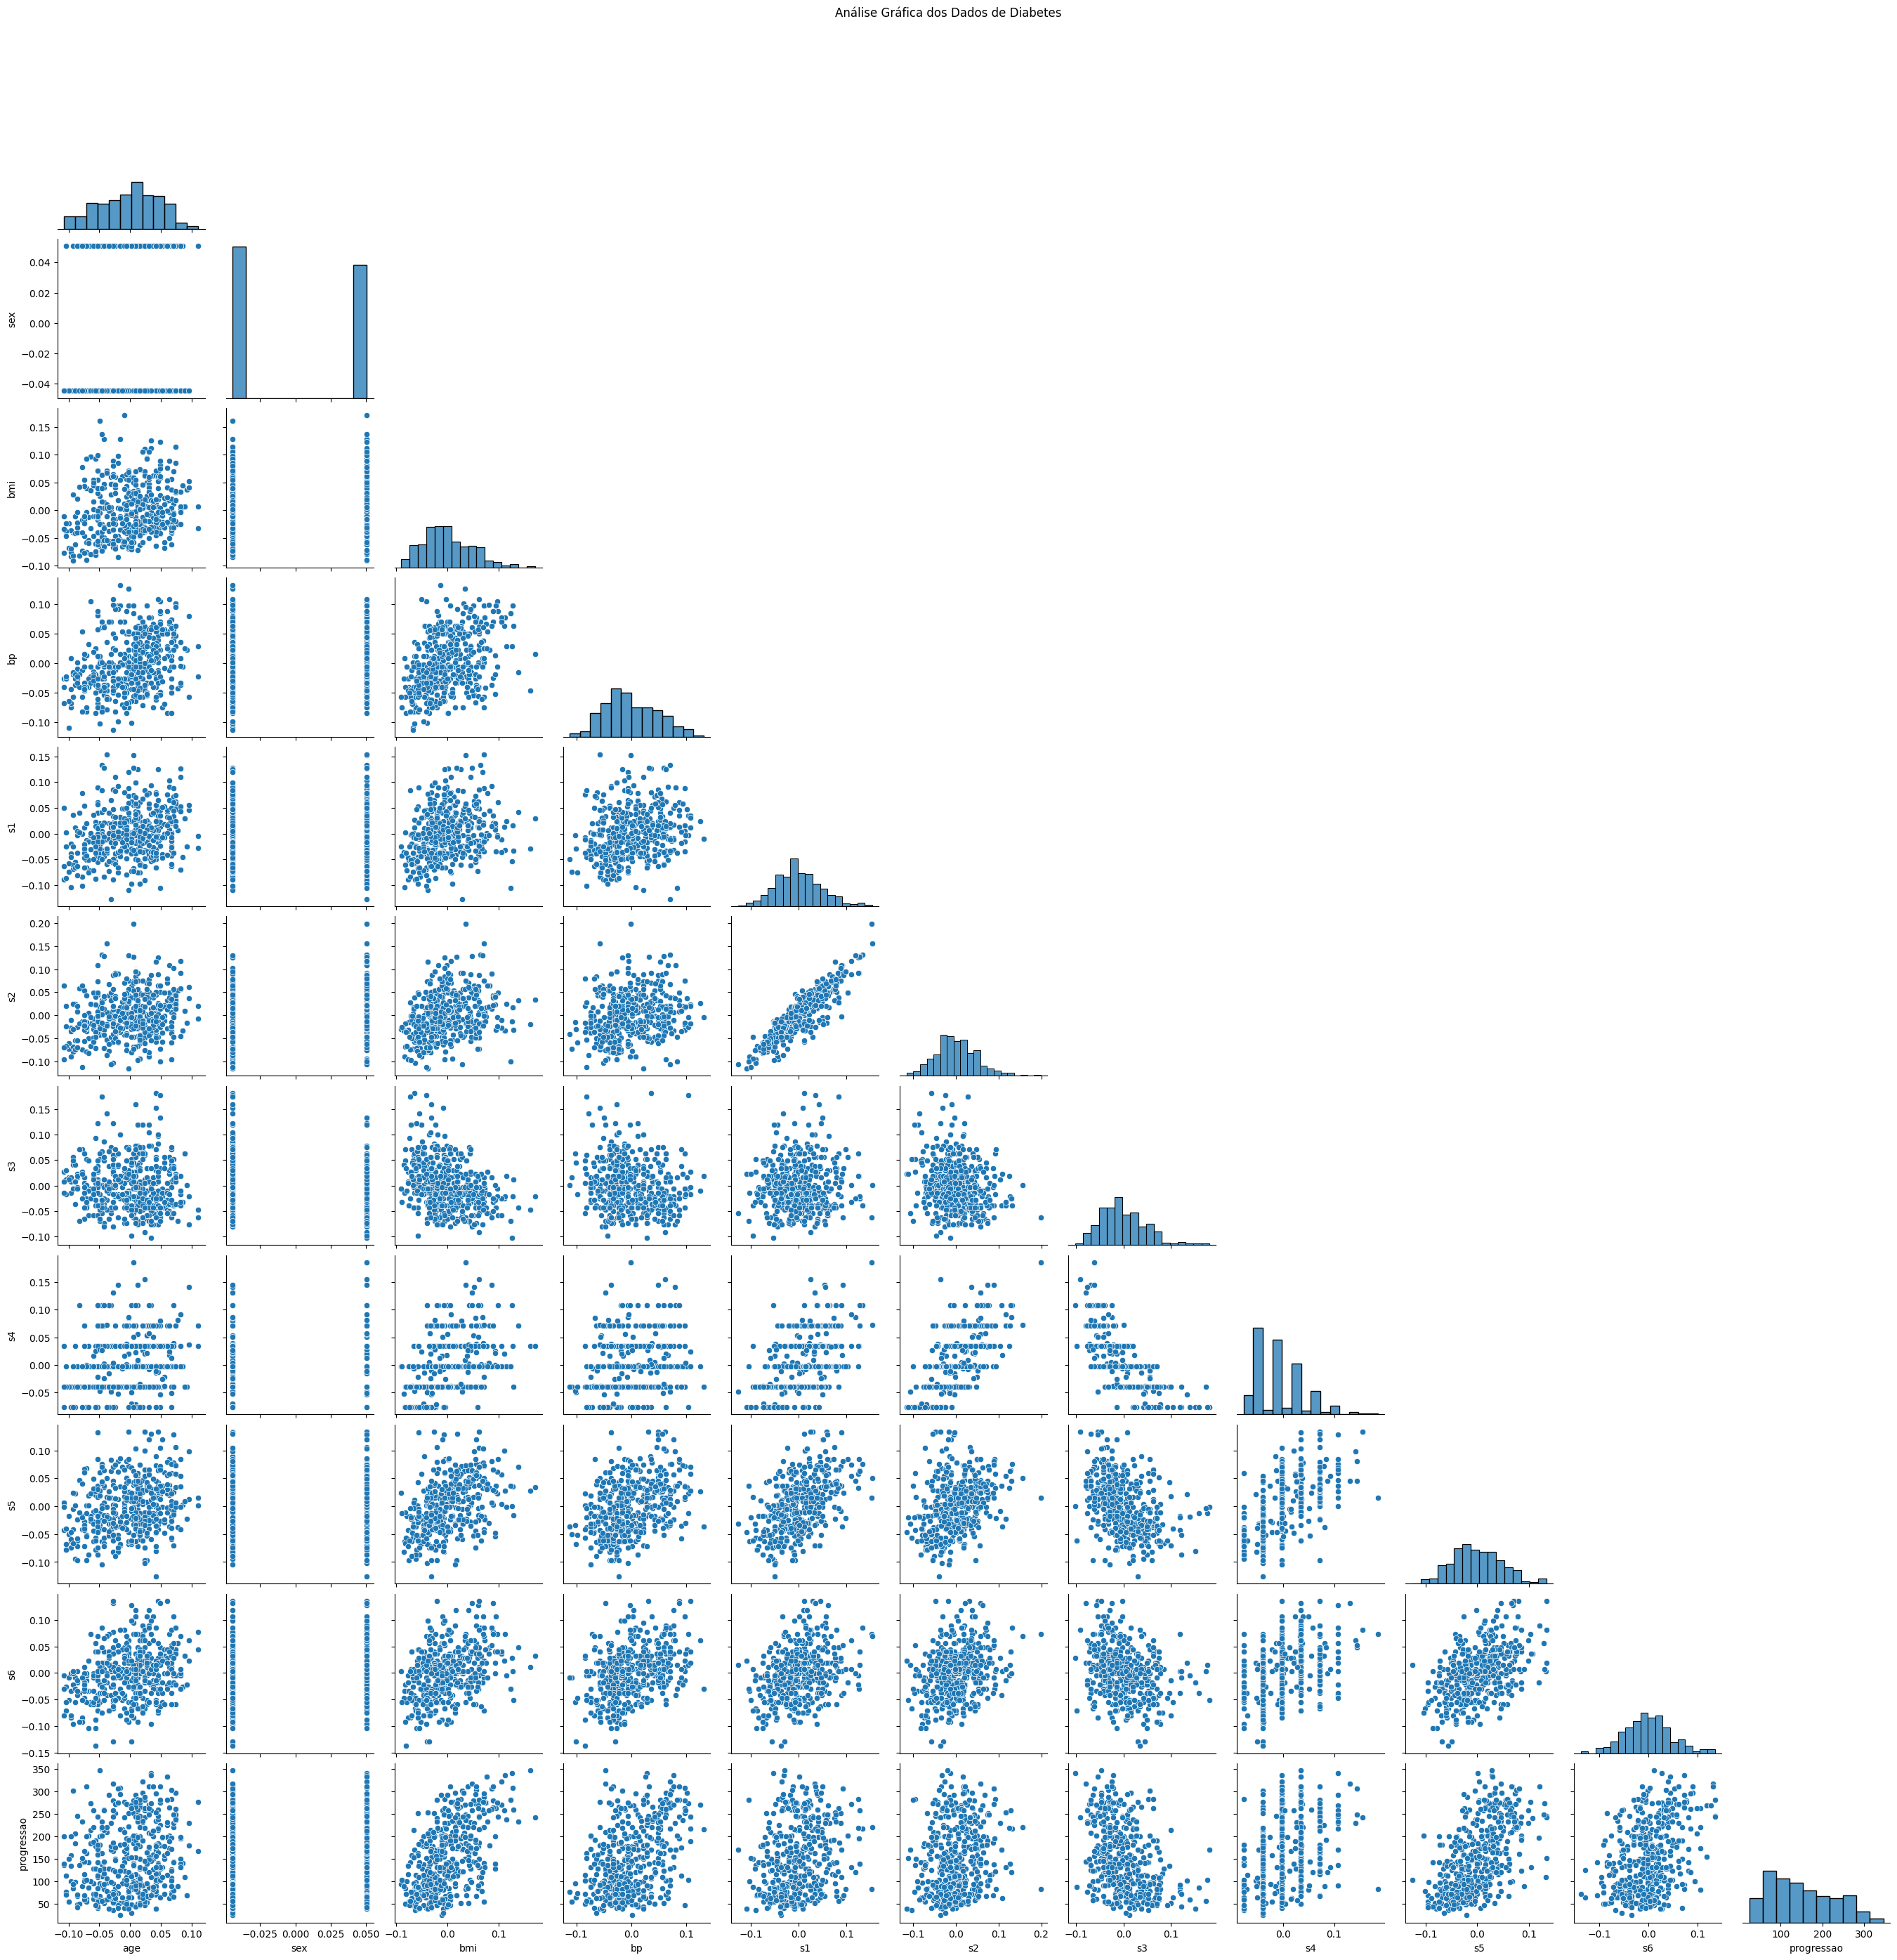

In [ ]:
# Análise gráfica - Pairplot
sns.pairplot(db_df, corner=True)
plt.suptitle("Análise Gráfica dos Dados de Diabetes", y=1.02)
plt.show()

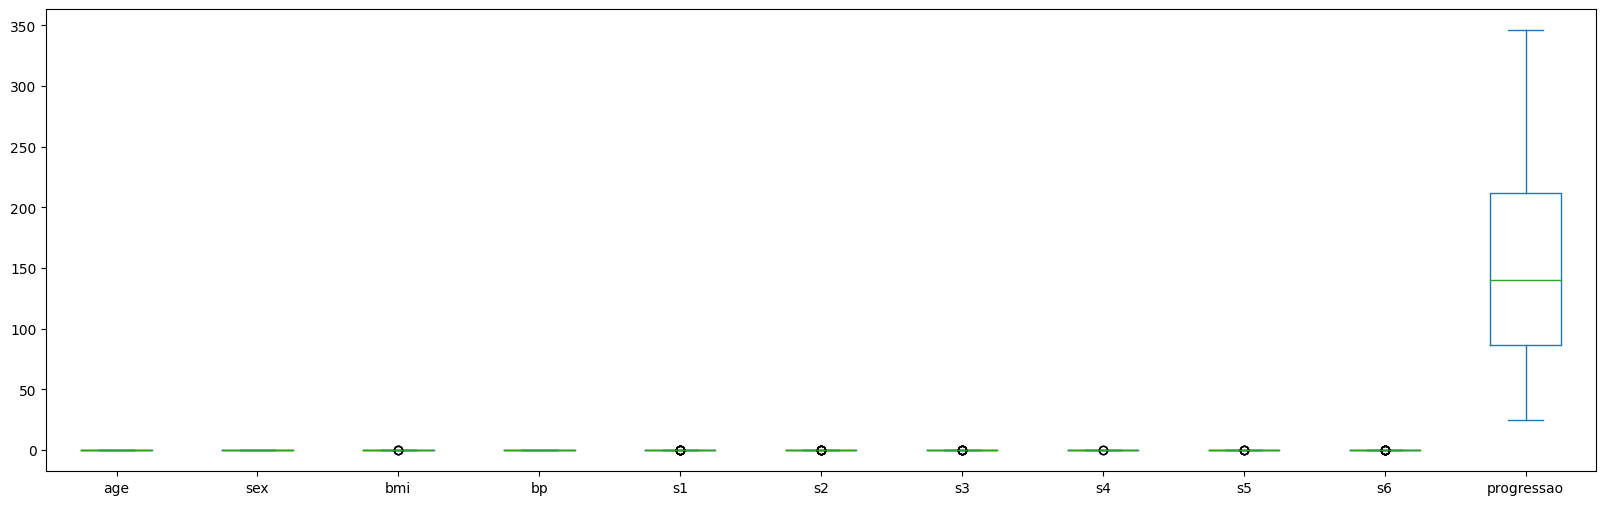

In [ ]:
db_df.plot.box(figsize=(20,6));

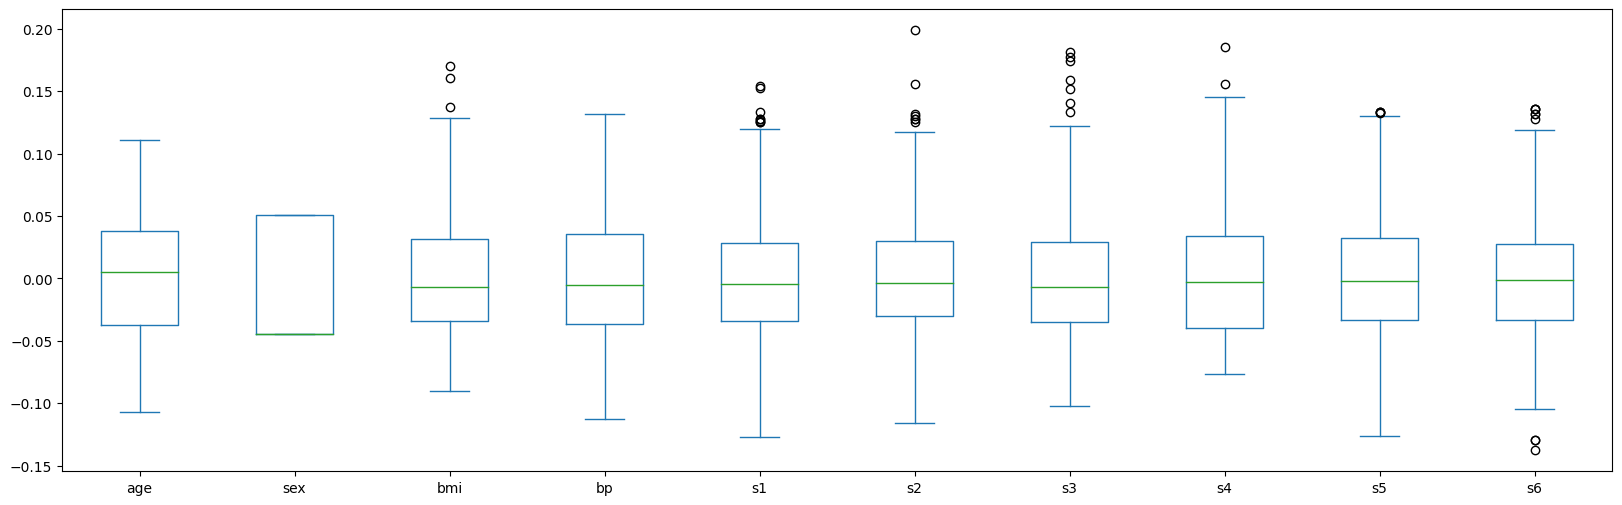

In [ ]:
diabetes_boxplot = db_df.drop(['progressao'],axis=1)
diabetes_boxplot.plot.box(figsize=(20,6));

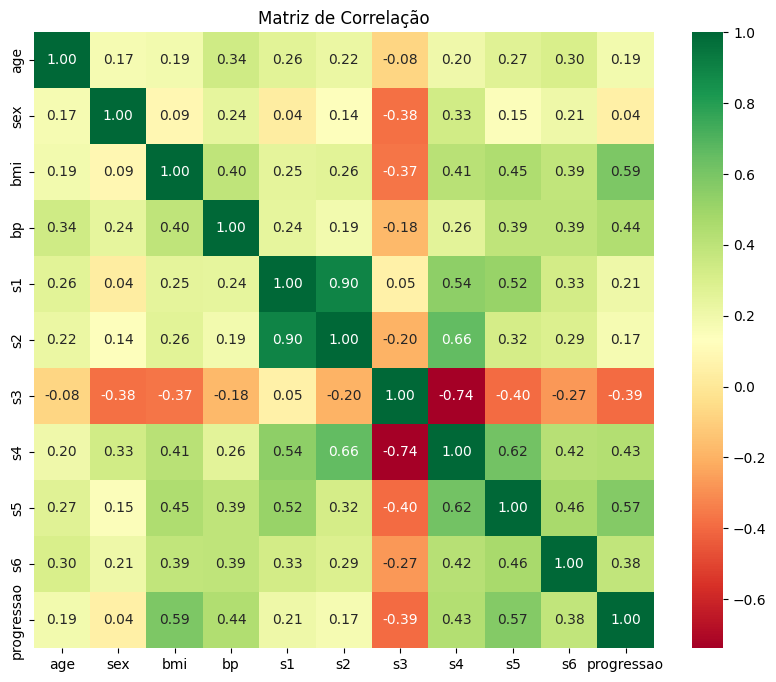

In [ ]:
# Correlação entre variáveis
correlation_matrix = db_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Maiores correlações com a progressão :
   - bmi : 0.59
   - s5 : 0.57
   - bp : 0.44
   - s4 : 0.43
   - s3: -0.39    

Criando modelos baseado na correlação das variáveis

In [ ]:
db_df.head(0) #para verificar o nome das variaveis

In [ ]:
results = []

Regressão linear simples com a variável mais correlacionada com nossa resposta

In [ ]:
lm1 = sm.OLS.from_formula("progressao ~ bmi", data=db_df)

In [ ]:
model_1 = lm1.fit()

In [ ]:
print("Análise do Modelo 1:")
print(model_1.summary())
print("=" * 80)

In [ ]:
residuos1 = model_1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_1.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_1.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 1 - Full')

In [ ]:
estatistica, p, f, fp = het_breuschpagan(model_1.resid, model_1.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

In [ ]:
residuos_padronizados = model_1.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 1')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| bmi    | ❌                               |  ❌                           |  ❌         | ✅        |

In [ ]:
results.append({
    'Modelo': 'Modelo 1',
    'MAE': np.mean(np.abs(y - model_1.predict())),
    'MSE': np.mean((y - model_1.predict())**2),
    'AIC': model_1.aic,
    'BIC': model_1.bic,
    'R²': model_1.rsquared
})

In [ ]:
lm2 = sm.OLS.from_formula("progressao ~ bmi+s5", data=db_df)
model_2 = lm2.fit()
print("Análise do Modelo 2:")
print(model_2.summary())
print("=" * 80)

In [ ]:
residuos2 = model_2.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_2.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_2.fittedvalues, y=residuos2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 2')

In [ ]:
estatistica, p, f, fp = het_breuschpagan(model_2.resid, model_2.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

In [ ]:
residuos_padronizados = model_2.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 2')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| bmi     | ❌                               |  ❌                          |  ❌         | ✅        |
| bmi + s5| ❌                               |  ❌                           |  ❌         | ✅        |

In [ ]:
results.append({
    'Modelo': 'Modelo 2',
    'MAE': np.mean(np.abs(y - model_2.predict())),
    'MSE': np.mean((y - model_2.predict())**2),
    'AIC': model_2.aic,
    'BIC': model_2.bic,
    'R²': model_2.rsquared
})

In [ ]:
lm3 = sm.OLS.from_formula("progressao ~ bmi+s5+bp", data=db_df)
model_3 = lm3.fit()
print("Análise do Modelo 3:")
print(model_3.summary())
print("=" * 80)

In [ ]:
residuos1 = model_3.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 3", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_3.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_3.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 3')

In [ ]:
estatistica, p, f, fp = het_breuschpagan(model_3.resid, model_3.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')


In [ ]:
residuos_padronizados = model_3.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 1')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| bmi     | ❌                               |  ❌                           |  ❌         | ✅        |
| bmi+s5  | ❌                               |  ❌                           |  ❌         | ❌        |
|bmi+s5+bp| ❌                                |  ❌                          |  ❌        | ✅        |

In [ ]:
results.append({
    'Modelo': 'Modelo 3',
    'MAE': np.mean(np.abs(y - model_3.predict())),
    'MSE': np.mean((y - model_3.predict())**2),
    'AIC': model_3.aic,
    'BIC': model_3.bic,
    'R²': model_3.rsquared
})

In [ ]:
lm4 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4", data=db_df)
model_4 = lm4.fit()
print("Análise do Modelo 4:")
print(model_4.summary())
print("=" * 80)

In [ ]:
residuos1 = model_4.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 4", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_4.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))


In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_4.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 1 - Full')

In [ ]:

estatistica, p, f, fp = het_breuschpagan(model_4.resid, model_4.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

In [ ]:
residuos_padronizados = model_4.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 4')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo         | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|----------------|----------------------------------|----------------------------|---------|----------|
| bmi            | ❌                               |  ❌                           | ❌         | ✅        |
| bmi+s5         | ❌                               |  ❌                          |  ❌         | ✅         |
|bmi+s5+bp       | ✅                               |  ✅                          |  ❌         | ✅         |
|bmi+s5+bp+s4    | ✅                               |  ✅                          |  ❌         | ✅        |


In [ ]:
    'Modelo': 'Modelo 4',
    'MAE': np.mean(np.abs(y - model_4.predict())),
    'MSE': np.mean((y - model_4.predict())**2),
    'AIC': model_4.aic,
    'BIC': model_4.bic,
    'R²': model_4.rsquared
})

In [ ]:
lm5 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4+s3", data=db_df)
model_5 = lm5.fit()
print("Análise do Modelo 5:")
print(model_5.summary())
print("=" * 80)

In [ ]:
residuos1 = model_5.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 5", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_5.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_5.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 1 - Full')

In [ ]:
estatistica, p, f, fp = het_breuschpagan(model_5.resid, model_5.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

In [ ]:
residuos_padronizados = model_5.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 5')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')


#### Análise geral dos residuos:
| Modelo         | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|----------------|----------------------------------|----------------------------|---------|----------|
| bmi            | ❌                               |  ❌                          |  ❌        | ✅        |
| bmi+s5         | ❌                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp       | ✅                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp+s4    | ✅                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp+s4+s3 | ✅                               |  ✅                          |  ✅        | ✅        |

In [ ]:
results.append({
    'Modelo': 'Modelo 5',
    'MAE': np.mean(np.abs(y - model_5.predict())),
    'MSE': np.mean((y - model_5.predict())**2),
    'AIC': model_5.aic,
    'BIC': model_5.bic,
    'R²': model_5.rsquared
})

In [ ]:
lm6 = sm.OLS.from_formula("progressao ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
model_6 = lm6.fit()
print("Análise do Modelo 6:")
print(model_6.summary())
print("=" * 80)

In [ ]:
residuos1 = model_6.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 6", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(model_6.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=model_6.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 6 - Full')

In [ ]:
estatistica, p, f, fp = het_breuschpagan(model_6.resid, model_6.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

In [ ]:
residuos_padronizados = model_6.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 1')
plt.xlabel('Progressao')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo         | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|----------------|----------------------------------|----------------------------|---------|----------|
|bmi             | ❌                               |  ✅                          |  ✅        | ✅        |
|bmi+s5          | ❌                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp       | ✅                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp+s4    | ✅                               |  ✅                          |  ✅        | ✅        |
|bmi+s5+bp+s4    | ✅                               |  ✅                          |  ✅        | ✅        |
|Full            | ✅                               |  ✅                          |  ✅        | ✅        |

In [ ]:
results.append({
    'Modelo': 'Modelo 6',
    'MAE': np.mean(np.abs(y - model_6.predict())),
    'MSE': np.mean((y - model_6.predict())**2),
    'AIC': model_6.aic,
    'BIC': model_6.bic,
    'R²': model_6.rsquared
})

In [ ]:
# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Imprimir a tabela de resultados
print(results_df)

Observe que nem sempre as métricas irao coincidir. Por isso devemos entender o que sera melhor para o nosso modelo.

Exercício -
- Utilizando a base de dados 'Consumo_cerveja.csv'. Realize a comparação dos modelos, adicionando uma a uma, as variáveis mais correlacionadas com a resposta.